#### Continuous Probability Queries

In [79]:
# Importing the necessary lib.
import pandas as pd 
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

In [80]:
#importing the file for the access
df=pd.read_csv('C:/Users/5530/OneDrive/Desktop/Mall_Customer_Segmentation/Data_files/customer_arrivals_removed_outliers_.csv')

***1. What is the probability that a customer spends more than 100 minutes?***

In [81]:
# Fit normal distribution to Duration_min
mu = df['Duration_min'].mean()
sigma = df['Duration_min'].std()

#P(X-100) = 1 - CDF(100)
PROB = 1- norm.cdf(100,mu,sigma)
print(f'Customer who spend more than 100 min in the mall: {PROB:.2f}')


Customer who spend more than 100 min in the mall: 0.70


***2. What is the expected duration of a customer's stay?***

In [82]:
expected_duration = df['Duration_min'].mean()
print(f"Business Insight :Expected duration of customer stay {expected_duration:.2f} minutes")

Business Insight :Expected duration of customer stay 133.06 minutes


***3. What is the probability that a customer spend between 10k and 15k?***

In [83]:
mu_tot = df['Total Spending'].mean()
sigma_tot = df['Total Spending'].std()

lower_tot = norm.cdf(1000,mu_tot,sigma_tot)
upper_tot = norm.cdf(15000,mu_tot,sigma_tot)

prob_tot = upper_tot-lower_tot
print(f'Prob of customer who gone stay btw 60 - 90 min :{prob_tot:.2f}')

Prob of customer who gone stay btw 60 - 90 min :0.73


***4. What is the Z-score of a customer who spent ₹15,000?***

In [84]:
z_score = (15000 - mu_tot) / sigma_tot
print(f"Z-score for ₹15,000 spent: {z_score:.2f}")

Z-score for ₹15,000 spent: 0.64


-----------------------------------------------------------------------------------------

***Business Insights :The z-score show use that they spent a little more than the average customer, but not enough to be considered a VIP or outlier.***

-----------------------------------------------------------------------------------------

***Visual Representation of the Z-score putting Label on them***

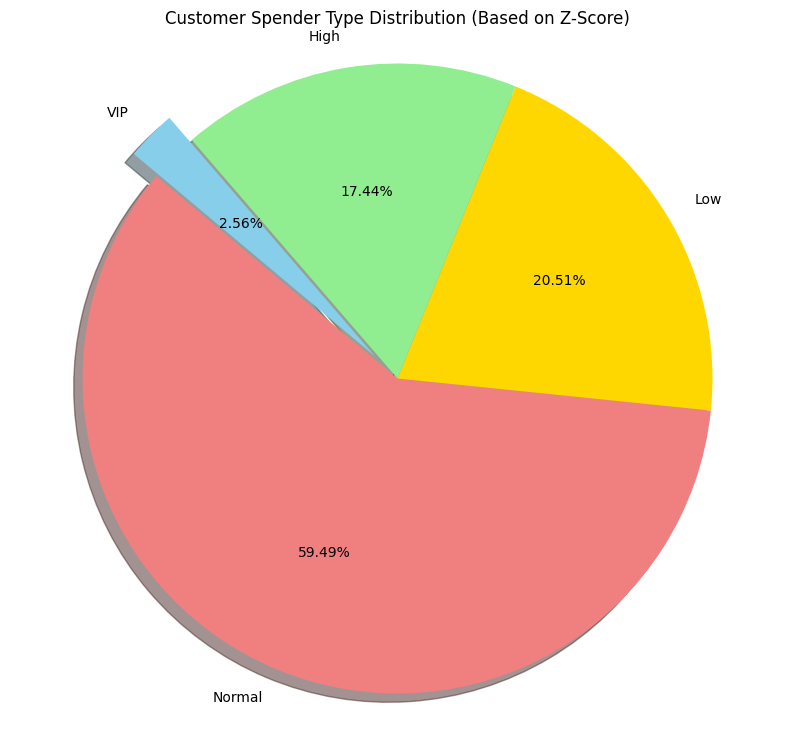

In [85]:
# Step 1: Define Z-score classification function
def classify_spender(z):
    if z > 2:
        return "VIP" #Label for the Highest spender
    elif z > 1:
        return "High" #Label for the High spender
    elif z > -1:
        return "Normal" #Label for the Normal spender
    else:
        return "Low"  #Label for the lowest spender

# Step 2: Compute Z-score and classify spenders
mu_tot = df['Total Spending'].mean()
sigma_tot = df['Total Spending'].std()

df['Z_spend'] = ((df['Total Spending'] - mu_tot) / sigma_tot).round(2)
df['Spender_Type'] = df['Z_spend'].apply(classify_spender) #Putting in the function for label

# Step 3: Count spender types
spender_counts = df['Spender_Type'].value_counts()

# Step 4: Plot pie chart
plt.figure(figsize=(10, 9))
colors = ['lightcoral', 'gold', 'lightgreen', 'skyblue']
explode = [0.1 if label == 'VIP' else 0 for label in spender_counts.index]

plt.pie(spender_counts, labels=spender_counts.index, autopct='%2.2f%%',
        startangle=140, colors=colors, explode=explode, shadow=True)

plt.title("Customer Spender Type Distribution (Based on Z-Score)")
plt.axis('equal')  
plt.show()


***Business Insight:-***

Those customer form the list of Z_spend which close to or have value 1.6 standard deviations above average in income/spending — we can consider them a potential VIP and target them for premium offers

***6. Categorize customers based on spend percentiles***

In [86]:
df['Spending_Tier'] = pd.qcut(df['Total Spending'], q=4, labels=['Low', 'Medium', 'High', 'Premium'])
print(df[['Total Spending', 'Spending_Tier']].head())

   Total Spending Spending_Tier
0         20600.0       Premium
1          9768.0        Medium
2          8787.0        Medium
3         15664.0       Premium
4         10710.0        Medium


----------------

***Business Insights from these Queries:***

-----------------------------------

***1. P(> ₹10,000)***

Helps identify high-value customers worth targeting with loyalty rewards

***2. P(₹10k–₹15k)***

Shows the most common customer spend window — great for bundling products

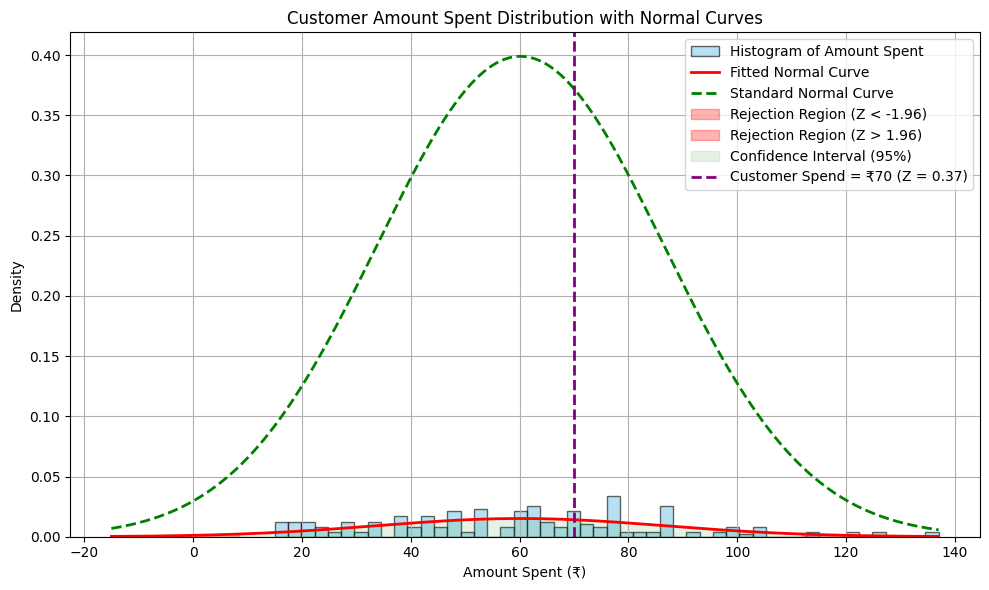

Z-Score for ₹70 = 0.37
✅ This spend is within the normal range.


In [87]:
# Mean & Std of actual data
mu = df['Annual Income (k$)'].mean()
sigma = df['Annual Income (k$)'].std()

# Example customer spend to calculate Z-score
customer_spend = 70
z_score = (customer_spend - mu) / sigma

# Histogram of actual amount spent
plt.figure(figsize=(10, 6))
count,bins,_=plt.hist(df['Annual Income (k$)'], bins=50, density=True, color='skyblue', edgecolor='black', alpha=0.6, label="Histogram of Amount Spent")

# Fitted normal curve (based on dataset)
x = np.linspace(min(bins)-30, max(bins), 10000) # Sub value 30 from it for the better visualization
fitted_pdf = norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, fitted_pdf, color='red', linewidth=2, label='Fitted Normal Curve')

# Standard normal curve
standard_x = (x - mu) / sigma  # convert to Z-scale
standard_pdf = norm.pdf(standard_x)
plt.plot(x, standard_pdf, linestyle='--', color='green', linewidth=2, label='Standard Normal Curve')

# Z-critical for 95% confidence
z_crit = 1.96
left_cutoff = mu - z_crit * sigma
right_cutoff = mu + z_crit * sigma
pdf = norm.pdf(x, mu, sigma)

# Shade rejection regions (two-tailed)
plt.fill_between(x, 0, pdf, where=(x < left_cutoff), color='red', alpha=0.3, label='Rejection Region (Z < -1.96)')
plt.fill_between(x, 0, pdf, where=(x > right_cutoff), color='red', alpha=0.3, label='Rejection Region (Z > 1.96)')

# Shade confidence zone (middle 95%)
plt.fill_between(x, 0, pdf, where=(x >= left_cutoff) & (x <= right_cutoff), 
                 color='green', alpha=0.1, label='Confidence Interval (95%)')


# Add vertical Z-score line
plt.axvline(customer_spend, color='purple', linestyle='dashed', linewidth=2,
            label=f'Customer Spend = ₹{customer_spend} (Z = {z_score:.2f})')

# Add grid, labels, legend
plt.title("Customer Amount Spent Distribution with Normal Curves")
plt.xlabel("Amount Spent (₹)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print interpretation
print(f"Z-Score for ₹{customer_spend} = {z_score:.2f}")
if abs(z_score) > 1.96:
    print("🚨 This spend is statistically unusual — customer is likely deeply engaged (outlier).")
else:
    print("✅ This spend is within the normal range.")


In [88]:
print(f"Mean of Annual Income: {mu:.2f}, Std Dev of the Annual Income: {sigma:.2f}")
print(f"Left cutoff: {left_cutoff:.2f}, Right cutoff: {right_cutoff:.2f}")


Mean of Annual Income: 60.15, Std Dev of the Annual Income: 26.37
Left cutoff: 8.47, Right cutoff: 111.83


***Values that fall under the 95% in the graph***

In [89]:
#Shown in the visualization but repreated here again
lower= mu-1.96*sigma
upper = mu+1.96*sigma

print('Values that will fall under the 95% ')
print(f'{"-"*60}')
print(f'Lower Bound values :🔻{lower:.2f}')   # can use left_cutoff same thing
print(f'Upper Bound values :🔺{upper:.2f}')   # can use right_cutoff same thing 

Values that will fall under the 95% 
------------------------------------------------------------
Lower Bound values :🔻8.47
Upper Bound values :🔺111.83


***95% of customers have annual income between ₹8,470 and ₹111,830
Anyone spending less than ₹8.47k or more than ₹111.83k is in the rejection region (outlier zone)***